In [13]:
%pip install seaborn

In [12]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Importing the folder with multiple CSVs and merging them into one renamed csv

import pandas as pd
import os

def merge_csv_files(folder_path, output_filename):
    """Merges all CSV files in a folder into a single CSV file.

    Args:
        folder_path: The path to the folder containing the CSV files.
        output_filename: The name of the output CSV file.
    """

    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    if not all_files:
      print(f"No CSV files found in {folder_path}")
      return

    merged_df = pd.DataFrame()
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(file_path)
            merged_df = pd.concat([merged_df, df], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(f"Warning: Skipping empty file: {file}")
        except pd.errors.ParserError:
            print(f"Warning: Skipping file with parsing errors: {file}")
        except Exception as e:
            print(f"Error reading {file}: {e}")

    output_path = os.path.join(folder_path, output_filename)
    merged_df.to_csv(output_path, index=False)
    print(f"Merged CSV files saved to {output_path}")
#Must add folder path from uploaded data.
folder_path = '/content/Yardages 2024'
output_filename = 'merged_golf_data_2024.csv'
merge_csv_files(folder_path, output_filename)

Merged CSV files saved to /content/Yardages 2024/merged_golf_data_2024.csv


In [5]:
df = pd.read_csv("/content/Yardages 2024/merged_golf_data_2024.csv")
# df.drop('0', axis=0, inplace=True) Convert column to numeric, coercing errors
# to NaN df['Club Speed'] = pd.to_numeric(df['Club Speed'],
# errors='coerce').fillna(0).astype(int) print(df['Club Speed'].dtype)

# Columns to convert
cols_to_convert = ['Club Speed', 'Attack Angle', 'Club Path', 'Club Face', 'Face to Path',	'Ball Speed', 'Launch Angle', 'Launch Direction', 'Backspin', 'Sidespin', 'Spin Rate', 'Spin Rate Type', 'Spin Axis', 'Apex Height', 'Carry Distance', 'Carry Deviation Angle', 'Carry Deviation Distance', 'Total Distance', 'Total Deviation Angle', 'Total Deviation Distance', 'Air Density', 'Temperature', 'Air Pressure', 'Relative Humidity']

# Convert selected columns to numeric, coercing errors to NaN
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# If specific integer type is needed (e.g., int32, int64), use astype after to_numeric
df[cols_to_convert] = df[cols_to_convert].fillna(0).astype(int)

df.drop(0, inplace=True)
df.drop('Note', axis=1, inplace=True)
#df.drop('Club Name', axis=1, inplace=True)
df.drop('Tag', axis=1, inplace=True)
df = df.round(3)

# Assuming 'Club Type' is a string column representing club names
# Example:  'Driver', '3 Wood', '5 Iron', etc.

# Create a dictionary to map club types to numerical values.
club_mapping = {
    'Driver': 'D',
    '3 Wood': '3w',
    '3 Hybrid': '3hy',
    '3 Iron': '3i',
    '4 Iron': '4i',
    '5 Iron': '5i',
    '6 Iron': '6i',
    '7 Iron': '7i',
    '8 Iron': '8i',
    '9 Iron': '9i',
    'Pitching Wedge': 'PW',
    'Sand Wedge': 'SW',
    'Gap Wedge':'GW',
    'Lob Wedge':'LW',
    # Add other club types and their corresponding numerical values
}

# Add a new column 'Club Number' based on the mapping
df['Club Name'] = df['Club Type'].map(club_mapping)

# Handle clubs not found in the mapping (assign a default value or NaN)
df['Club Name'].fillna(0, inplace=True) # or df['Club Number'].fillna(np.nan, inplace=True)

# Now you can use the 'Club Number' column in your analysis
print(df.head())

df.head()

                  Date Player Club Name Club Type  Club Speed  Attack Angle  \
1  01/06/2024 14:44:14   Josh        7i    7 Iron          90             2   
2  01/06/2024 14:44:50   Josh        7i    7 Iron          88             0   
3  01/06/2024 14:45:36   Josh       3hy  3 Hybrid         105             0   
4  01/06/2024 14:46:10   Josh       3hy  3 Hybrid         101             1   
5  01/06/2024 14:46:51   Josh       3hy  3 Hybrid          99             5   

   Club Path  Club Face  Face to Path  Ball Speed  ...  Carry Distance  \
1         -6         -2             3         121  ...             183   
2         -8         -3             4         125  ...             182   
3        -14          0            14         131  ...             176   
4         -1          1             2         140  ...             207   
5         -4         -3             0         137  ...             205   

   Carry Deviation Angle  Carry Deviation Distance  Total Distance  \
1         

<ipython-input-5-bec4ce876a26>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club Name'].fillna(0, inplace=True) # or df['Club Number'].fillna(np.nan, inplace=True)


,Date,Player,Club Name,Club Type,Club Speed,Attack Angle,Club Path,Club Face,Face to Path,Ball Speed,...,Carry Distance,Carry Deviation Angle,Carry Deviation Distance,Total Distance,Total Deviation Angle,Total Deviation Distance,Air Density,Temperature,Air Pressure,Relative Humidity
1,01/06/2024 14:44:14,Josh,7i,7 Iron,90,2,-6,-2,3,121,...,183,-2,-7,198,-2,-7,1,55,101,73
2,01/06/2024 14:44:50,Josh,7i,7 Iron,88,0,-8,-3,4,125,...,182,-1,-4,193,-1,-4,1,55,101,73
3,01/06/2024 14:45:36,Josh,3hy,3 Hybrid,105,0,-14,0,14,131,...,176,-2,-6,184,-2,-6,1,55,101,73
4,01/06/2024 14:46:10,Josh,3hy,3 Hybrid,101,1,-1,1,2,140,...,207,-5,-19,219,-5,-21,1,55,101,73
5,01/06/2024 14:46:51,Josh,3hy,3 Hybrid,99,5,-4,-3,0,137,...,205,0,-1,216,0,0,1,55,101,73


In [6]:
shot_count = len(df)
print(shot_count)

print(df.describe())

401
       Club Speed  Attack Angle   Club Path   Club Face  Face to Path  \
count  401.000000    401.000000  401.000000  401.000000    401.000000   
mean    97.391521      0.221945   -2.807980   -1.024938      1.768080   
std     16.592282      3.329882    5.922882    3.715424      6.318906   
min      0.000000    -10.000000  -20.000000  -19.000000    -21.000000   
25%     89.000000     -1.000000   -6.000000   -3.000000     -2.000000   
50%     98.000000      0.000000   -2.000000    0.000000      0.000000   
75%    106.000000      2.000000    0.000000    0.000000      5.000000   
max    162.000000      9.000000   19.000000   24.000000     30.000000   

       Ball Speed  Smash Factor  Launch Angle  Launch Direction      Backspin  \
count  401.000000    396.000000    401.000000        401.000000    401.000000   
mean   122.316708      1.240121     16.566085         -1.206983   4448.059850   
std     32.341180      0.193002     11.130644          3.348067   1981.053268   
min      0.000

In [7]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 1 to 401
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      396 non-null    object 
 1   Player                    396 non-null    object 
 2   Club Name                 401 non-null    object 
 3   Club Type                 396 non-null    object 
 4   Club Speed                401 non-null    int64  
 5   Attack Angle              401 non-null    int64  
 6   Club Path                 401 non-null    int64  
 7   Club Face                 401 non-null    int64  
 8   Face to Path              401 non-null    int64  
 9   Ball Speed                401 non-null    int64  
 10  Smash Factor              396 non-null    float64
 11  Launch Angle              401 non-null    int64  
 12  Launch Direction          401 non-null    int64  
 13  Backspin                  401 non-null    int64  
 14  Sidespin  

In [8]:
# prompt: convert club name to a string

df['Club Name'] = df['Club Name'].astype(str)

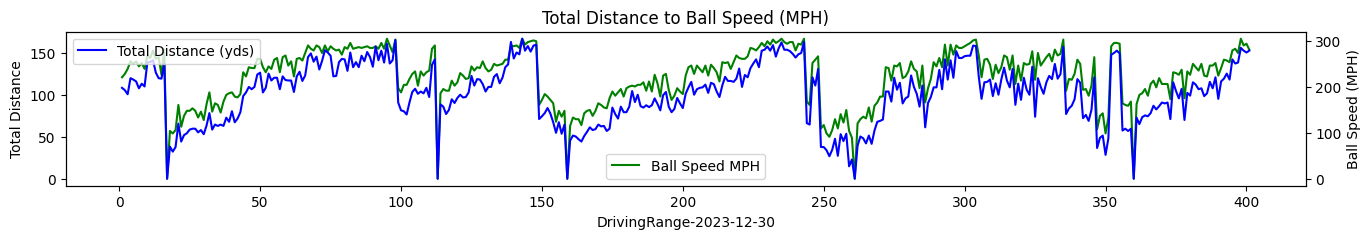

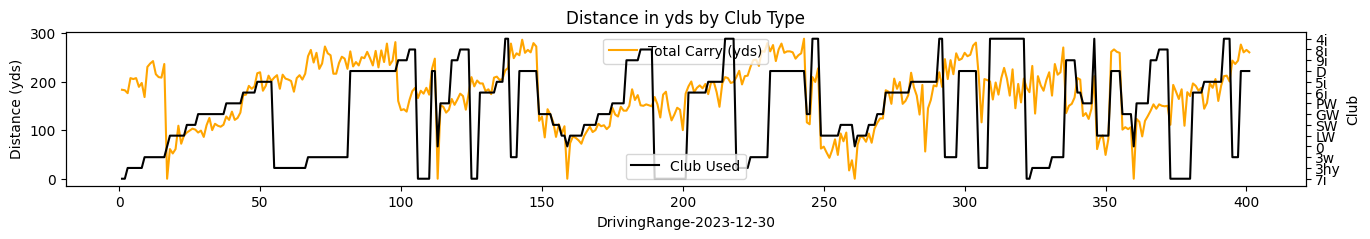

In [14]:
#Ball speed relative to yardage Data
fig = plt.figure(figsize=plt.figaspect(.10))
ax = fig.add_subplot(111)
ax.plot(df['Ball Speed'], label='Ball Speed MPH', color='Green')
# Share x axis
ax2 = ax.twinx()
ax2.plot(df['Total Distance'], label='Total Distance (yds)', color='Blue')
ax2.set_ylabel('Ball Speed (MPH)')
ax.set_ylabel('Total Distance')
ax.set_xlabel('DrivingRange-2023-12-30')
ax.set_title("Total Distance to Ball Speed (MPH)")
ax.legend(loc="lower center")
ax2.legend(loc="upper left")
# turn off grids for CO2
ax2.grid(False, which='both')

#Attack Angle relative to Spin Rate (RPM) Data
fig = plt.figure(figsize=plt.figaspect(.05))
ax = fig.add_subplot(111)
ax.plot(df['Carry Distance'], label='Total Carry (yds)', color='Orange')
# Share x axis
ax2 = ax.twinx()
ax2.plot(df['Club Name'], label='Club Used', color='Black')
ax2.set_ylabel('Club')
ax.set_ylabel('Distance (yds)')
ax.set_xlabel('DrivingRange-2023-12-30')
ax.set_title("Distance in yds by Club Type")
ax.legend(loc="upper center")
ax2.legend(loc="lower center")
# turn off grids for CO2
ax2.grid(False, which='both')

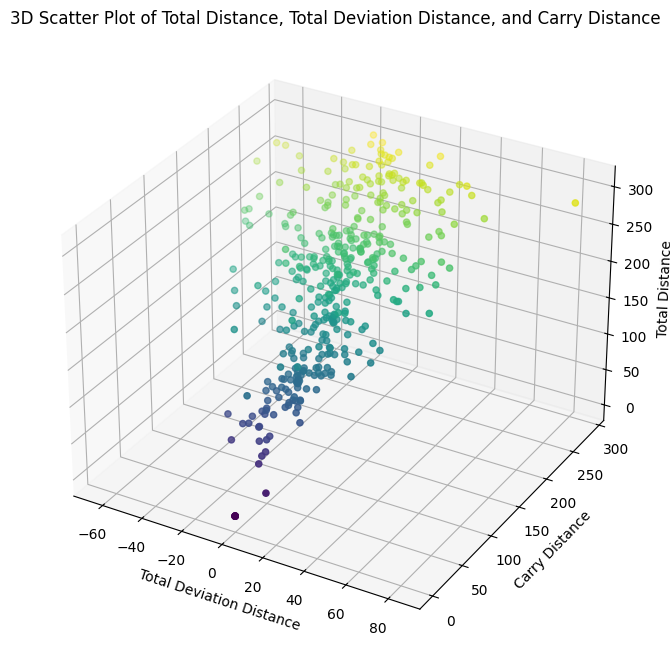

In [15]:
#3D scatter plot using total distance and total deviation distance

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Total Deviation Distance']
y = df['Carry Distance']
z = df['Total Distance']  # Or any other relevant third dimension

ax.scatter(x, y, z, c=z, cmap='viridis')  # Use color to represent z-values

ax.set_xlabel('Total Deviation Distance')
ax.set_ylabel('Carry Distance')
ax.set_zlabel('Total Distance')  # Or the name of your third dimension
ax.set_title('3D Scatter Plot of Total Distance, Total Deviation Distance, and Carry Distance')

plt.show()

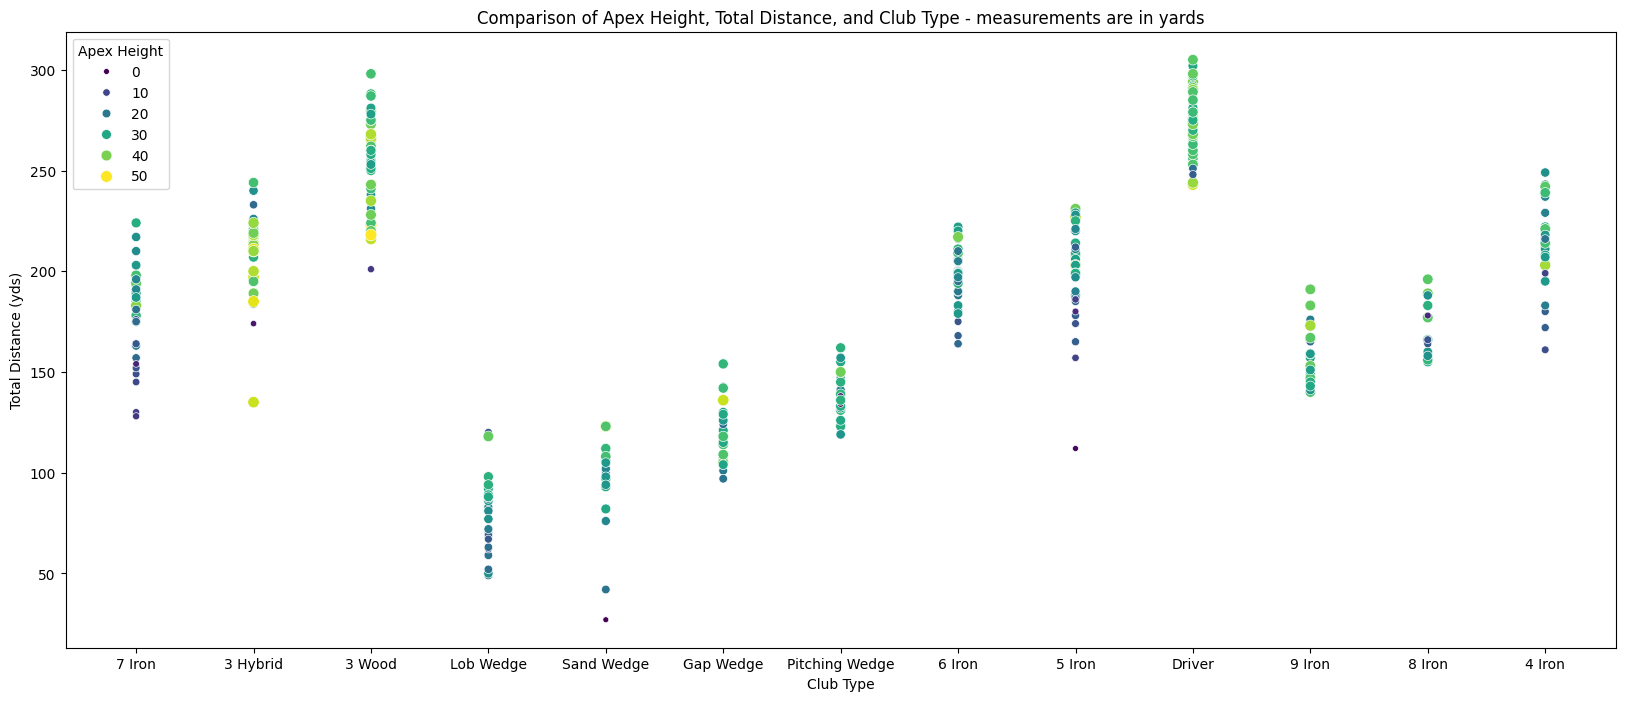

In [16]:
#Plot comparing apex height, total distance, and club type

plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='Club Type', y='Total Distance', hue='Apex Height', size='Apex Height', palette='viridis')
plt.title('Comparison of Apex Height, Total Distance, and Club Type - measurements are in yards')
plt.xlabel('Club Type')
plt.ylabel('Total Distance (yds)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


<Figure size 5000x3000 with 0 Axes>

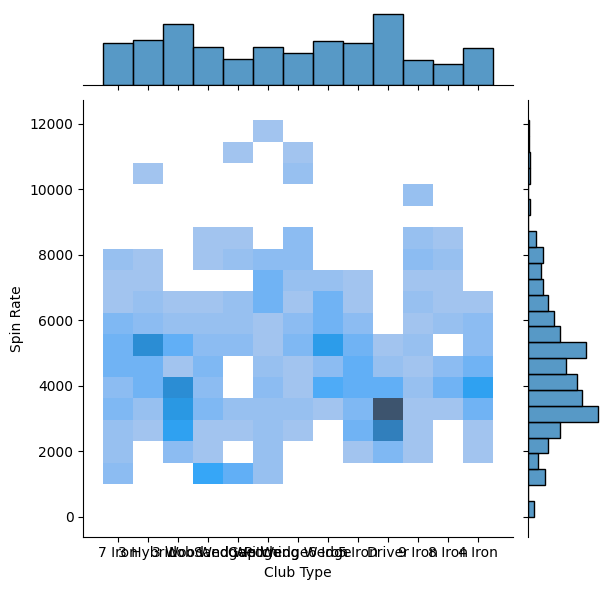

In [17]:
#Joint and marginal histogram for club type and spin rate

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Club Type' and 'Spin Rate' are columns in your DataFrame 'df'
plt.figure(figsize=(50, 30))
sns.jointplot(data=df, x='Club Type', y='Spin Rate', kind='hist', marginal_kws=dict(bins=25, rug=True))
plt.show()

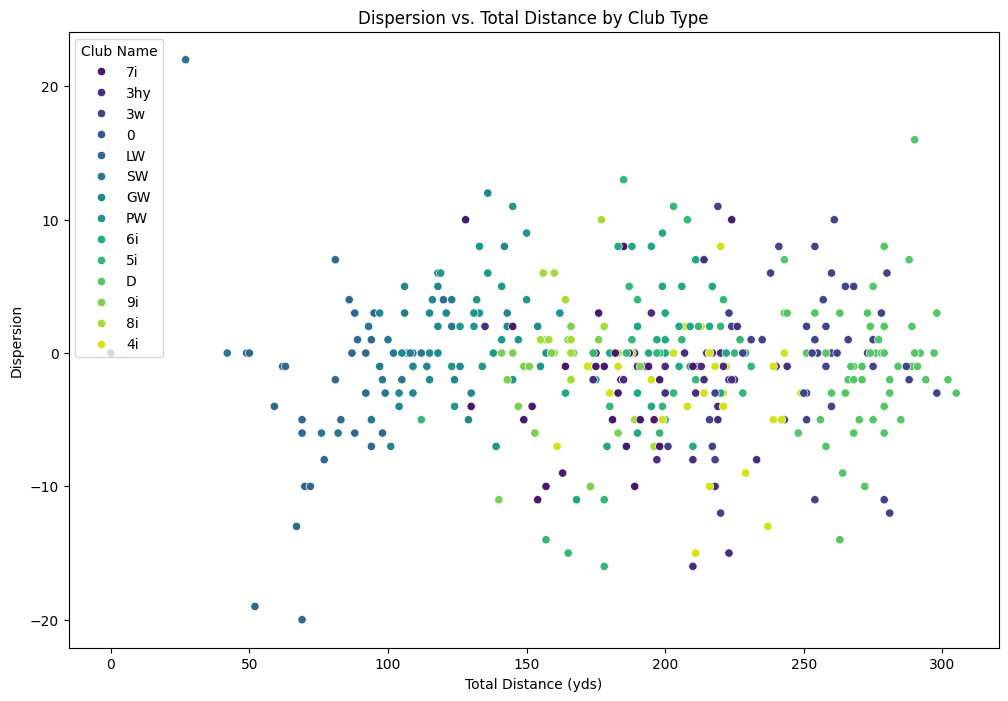

In [18]:
# prompt: Bivariate plot with dispersion, total distance and club type

# Assuming 'Club Type', 'Total Distance', and 'Dispersion' (however it's defined) are columns in your DataFrame 'df'

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Total Distance', y='Total Deviation Angle', hue='Club Name', palette='viridis')
plt.title('Dispersion vs. Total Distance by Club Type')
plt.xlabel('Total Distance (yds)')
plt.ylabel('Dispersion') # Replace with your dispersion measure column name
plt.show()